In [1]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', None)
train_df = pd.read_csv("train.csv")

In [3]:
train_df.shape

(75000, 4)

In [4]:
train_df.head(10)

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.97
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0\nUnit: Count\n",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.49
5,9259,"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano\nBullet Point 2: Large Size, Chef Bottle\nBullet Point 3: Packed in the USA\nValue: 6.25\nUnit: ounce\n",https://m.media-amazon.com/images/I/81nw0HXpCRL.jpg,18.50
6,191846,"Item Name: Goya Foods Sazonador Total Seasoning, 30 Ounce (Pack of 6)\nBullet Point 1: SAZONADOR TOTAL | Enhance the natural flavors of food with the perfect mix of natural ingredients, Goya Sazonador Total. GOYA Sazonador Total adds super flavor in a flash. This versatile seasoning mix includes the perfect blend of Latino spices that makes your meal extra special. We’re sure you’ll love it.\nBullet Point 2: THE PERFECT SEASONING | GOYA Sazonador Total is the perfect blend of garlic, onion and Latin spices that adds quick flavor to any meat, chicken, fish and vegetables. Just sprinkle over meats, poultry, seafood and vegetables before cooking. You can also use it to punch up the taste of salads, sauces, and soups. A simple shake is all it takes!\nBullet Point 3: VERSATILE | This versatile seasoning mix includes the perfect blend of Latino spices that makes 

In [5]:
train_df = train_df.drop(['image_link'],axis='columns')
train_df.head(1)

,sample_id,catalog_content,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",4.89


### Data Preprocessing

#### Target variable log transformation

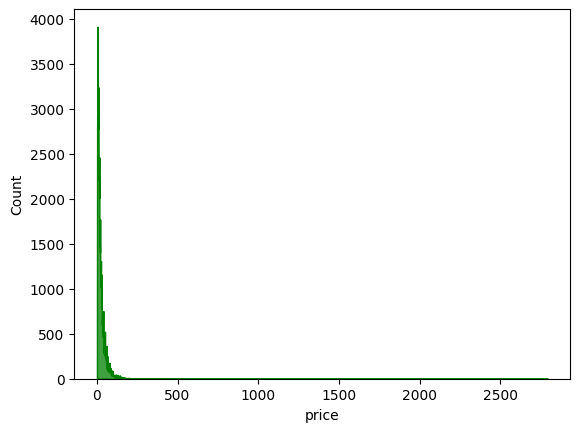

In [6]:
y_train_df = train_df['price']
plt.figure()
sns.histplot(y_train_df, element = 'poly', color = 'green')
plt.show()

In [7]:
y_train_df.describe()

,price
count,75000.000000
mean,23.647654
std,33.376932
min,0.130000
25%,6.795000
50%,14.000000
75%,28.625000
max,2796.000000


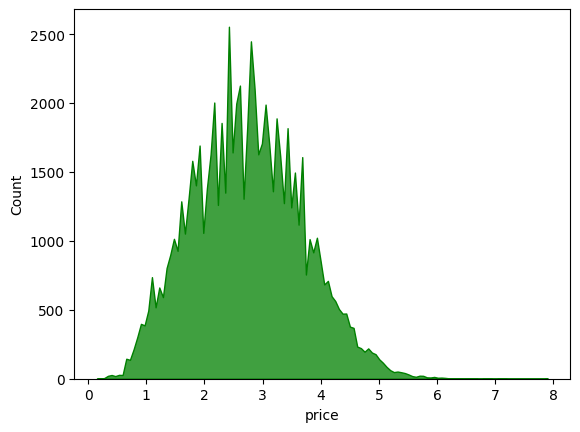

In [8]:
y_train_df = np.log1p(y_train_df) # log transformation
sns.histplot(y_train_df, element = 'poly', color = 'green')
plt.show()

In [9]:
train_df['log_price'] = np.log1p(train_df['price'])
train_df.head()

,sample_id,catalog_content,price,log_price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",4.89,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter\nBullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total\nBullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries\nBullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family\nBullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925\nValue: 32.0\nUnit: Ounce\n",13.12,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet Point 1: Loaded with hearty long grain wild rice and vegetables\nBullet Point 2: Full of hearty goodness\nBullet Point 3: Single serve bowls\nBullet Point 4: Easy to prepare mix\nBullet Point 5: 0 grams trans fat\nValue: 11.4\nUnit: Ounce\n",1.97,1.088562
3,55858,"Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings and Salad Dressings - Great for Dips, Spreads and Sauces - Made in USA\nBullet Point 1: Add to your favorite appetizers, dips & spreads. Use to season popcorn or warmed pita chips.\nBullet Point 2: Sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nBullet Point 3: Made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nBullet Point 4: Ingredients: Blue Cheese (Milk, Salt, Cultures, & Enzymes) and Disodium Phosphate\nBullet Point 5: Since 2009, Judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nProduct Description: Judees Powdered Blue Cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. Make your own alfredo sauce with heavy cream and black buffalo dip with this powder. It adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. Add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. Combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nValue: 11.25\nUnit: Ounce\n",30.34,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nValue: 12.0\nUnit: Count\n",66.49,4.211979


In [10]:
train_df.isnull().sum()

,0
sample_id,0
catalog_content,0
price,0
log_price,0


#### Converting catalog_content to lowercase

In [11]:
train_df['catalog_content'] = train_df['catalog_content'].str.lower()
train_df.head(1)

,sample_id,catalog_content,price,log_price
0,33127,"item name: la victoria green taco sauce mild, 12 ounce (pack of 6)\nvalue: 72.0\nunit: fl oz\n",4.89,1.773256


### Feature Extraction
#### Extracting Value And Count features

In [12]:
import re

train_df['quantity_value'] = train_df['catalog_content'].str.extract(r'value:\s*([^\n]+)')
train_df['quantity_unit'] = train_df['catalog_content'].str.extract(r'unit:\s*([^\n]+)')

train_df.head()

,sample_id,catalog_content,price,log_price,quantity_value,quantity_unit
0,33127,"item name: la victoria green taco sauce mild, 12 ounce (pack of 6)\nvalue: 72.0\nunit: fl oz\n",4.89,1.773256,72.0,fl oz
1,198967,"item name: salerno cookies, the original butter cookies, 8 ounce (pack of 4)\nbullet point 1: original butter cookies: classic butter cookies made with real butter\nbullet point 2: variety pack: includes 4 boxes with 32 cookies total\nbullet point 3: occasion perfect: delicious cookies for birthdays, weddings, anniversaries\nbullet point 4: shareable treats: fun to give and enjoy with friends and family\nbullet point 5: salerno brand: trusted brand of delicious butter cookies since 1925\nvalue: 32.0\nunit: ounce\n",13.12,2.647592,32.0,ounce
2,261251,"item name: bear creek hearty soup bowl, creamy chicken with rice, 1.9 ounce (pack of 6)\nbullet point 1: loaded with hearty long grain wild rice and vegetables\nbullet point 2: full of hearty goodness\nbullet point 3: single serve bowls\nbullet point 4: easy to prepare mix\nbullet point 5: 0 grams trans fat\nvalue: 11.4\nunit: ounce\n",1.97,1.088562,11.4,ounce
3,55858,"item name: judee’s blue cheese powder 11.25 oz - gluten-free and nut-free - use in seasonings and salad dressings - great for dips, spreads and sauces - made in usa\nbullet point 1: add to your favorite appetizers, dips & spreads. use to season popcorn or warmed pita chips.\nbullet point 2: sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nbullet point 3: made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nbullet point 4: ingredients: blue cheese (milk, salt, cultures, & enzymes) and disodium phosphate\nbullet point 5: since 2009, judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nproduct description: judees powdered blue cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. make your own alfredo sauce with heavy cream and black buffalo dip with this powder. it adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nvalue: 11.25\nunit: ounce\n",30.34,3.444895,11.25,ounce
4,292686,"item name: kedem sherry cooking wine, 12.7 ounce - 12 per case.\nbullet point: kedem sherry cooking wine, 12.7 ounce - 12 per case.\nvalue: 12.0\nunit: count\n",66.49,4.211979,12.0,count


In [13]:
pd.set_option('display.max_rows', None)
unit_counts = train_df['quantity_unit'].value_counts()
print(unit_counts)

quantity_unit
ounce                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         42940
count                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Standardizing quantity units

#### Defining standard units and assining these std units to products

In [14]:
standard_units = {
    "ounce": ["oz", "ounce", "ounces", "oz."],
    "fluid ounce": ["fl oz", "fl. oz", "fl.oz", "fluid ounce", "fluid ounces", "fluid ounce(s)", "fl ounce", "fl. oz."],
    "gram": ["gram", "grams", "gramm", "gr", "grams(gm)"],
    "kg": ["kg","kilogram","kgs","kilograms"],
    "pound": ["pound", "pounds", "lb", "lbs"],
    "ml": ["ml", "millilitre", "milliliter"],
    "litre": ["litre", "liters", "ltr"],
    "count": ["count", "ct", "each", "piece","pc", "unit", "units"],
}
unit_map = {}
for standard, variants in standard_units.items():
    for v in variants:
        unit_map[v.strip().lower()] = standard


In [15]:
train_df['quantity_unit_clean'] = (
    train_df['quantity_unit']
    .astype(str)
    .str.strip()
    .str.lower()
    .map(unit_map)  # map to standard unit
    .fillna('other')  # everything else as 'other'
)

print(train_df['quantity_unit_clean'].value_counts())

quantity_unit_clean
ounce          44026
count          18283
fluid ounce    11334
other           1038
pound            240
gram              51
ml                14
litre              8
kg                 6
Name: count, dtype: int64


#### Extracting quantity from catalog where quantity_unit_clean is other

In [16]:
# Pre-build regex dynamically
unit_pattern = '|'.join(map(re.escape, unit_map.keys()))
base_pattern = rf'(\d+(?:\.\d+)?)\s*(?:{unit_pattern})'
pack_pattern = r'(?:pack of\s*|x\s*)(\d+)'

def extract_quantity_and_unit(text):
    if not isinstance(text, str):
        return None, None
    text = text.lower()

    # Base unit extraction
    base_match = re.search(base_pattern, text)
    pack_match = re.search(pack_pattern, text)

    total_qty, unit_clean = None, None
    if base_match:
        qty = float(base_match.group(1))
        raw_unit = base_match.group(0).replace(str(qty), '').strip()
        # clean raw unit
        for u in unit_map:
            if u in raw_unit:
                unit_clean = unit_map[u]
                break

        # Pack multiplier
        if pack_match:
            pack_qty = int(pack_match.group(1))
            total_qty = qty * pack_qty
        else:
            total_qty = qty

    elif pack_match:
        pack_qty = int(pack_match.group(1))
        total_qty = pack_qty
        unit_clean = "count"

    return total_qty, unit_clean

In [17]:
mask = train_df['quantity_unit_clean'] == 'other'

def update_row(row):
    if row['quantity_unit_clean'] == 'other':
        qty, unit = extract_quantity_and_unit(row['catalog_content'])
        if qty is not None and unit is not None:
            row['quantity_value'] = qty
            row['quantity_unit_clean'] = unit
    return row

train_df = train_df.apply(update_row, axis=1)
print(train_df['quantity_unit_clean'].value_counts())

quantity_unit_clean
ounce          44464
count          18458
fluid ounce    11334
other            341
pound            296
gram              66
ml                25
litre              8
kg                 8
Name: count, dtype: int64


#### Dropping remaining rows where quantity value and unit couldn't be extracted

In [18]:
train_df = train_df[train_df['quantity_unit_clean'] != 'other']  #removing rows with other quantity unit
train_df.shape

(74659, 7)

##### Drop rows with non numeric quantity value

In [19]:
train_df['quantity_value'] = pd.to_numeric(train_df['quantity_value'], errors='coerce')
train_df = train_df.dropna(subset=['quantity_value'])
train_df.shape

(74542, 7)

#### Standardizing weight units to grams and volume units to ml

In [20]:
weight_conversion = {
    'gram': 1,
    'kg': 1000,
    'pound': 453.592,
    'ounce': 28.3495
}

volume_conversion = {
    'ml': 1,
    'litre': 1000,
    'fluid ounce': 29.5735
}

def convert_value_to_standard(row):
    unit = row['quantity_unit_clean']
    qty = row['quantity_value']

    try:
        qty = float(qty)
    except (ValueError, TypeError):
        return qty

    if unit in weight_conversion:
        return round(qty * weight_conversion[unit],2)
    elif unit in volume_conversion:
        return round(qty * volume_conversion[unit],2)
    else:
         return int(qty)

def convert_unit_to_standard(row):
    unit = row['quantity_unit_clean']

    if unit in weight_conversion:
        return "gram"
    elif unit in volume_conversion:
        return "ml"
    else:
        return unit

train_df['quantity_value_standard'] = train_df.apply(convert_value_to_standard, axis=1)
train_df['quantity_unit_standard'] = train_df.apply(convert_unit_to_standard,axis=1)

train_df.head()

,sample_id,catalog_content,price,log_price,quantity_value,quantity_unit,quantity_unit_clean,quantity_value_standard,quantity_unit_standard
0,33127,"item name: la victoria green taco sauce mild, 12 ounce (pack of 6)\nvalue: 72.0\nunit: fl oz\n",4.89,1.773256,72.00,fl oz,fluid ounce,2129.29,ml
1,198967,"item name: salerno cookies, the original butter cookies, 8 ounce (pack of 4)\nbullet point 1: original butter cookies: classic butter cookies made with real butter\nbullet point 2: variety pack: includes 4 boxes with 32 cookies total\nbullet point 3: occasion perfect: delicious cookies for birthdays, weddings, anniversaries\nbullet point 4: shareable treats: fun to give and enjoy with friends and family\nbullet point 5: salerno brand: trusted brand of delicious butter cookies since 1925\nvalue: 32.0\nunit: ounce\n",13.12,2.647592,32.00,ounce,ounce,907.18,gram
2,261251,"item name: bear creek hearty soup bowl, creamy chicken with rice, 1.9 ounce (pack of 6)\nbullet point 1: loaded with hearty long grain wild rice and vegetables\nbullet point 2: full of hearty goodness\nbullet point 3: single serve bowls\nbullet point 4: easy to prepare mix\nbullet point 5: 0 grams trans fat\nvalue: 11.4\nunit: ounce\n",1.97,1.088562,11.40,ounce,ounce,323.18,gram
3,55858,"item name: judee’s blue cheese powder 11.25 oz - gluten-free and nut-free - use in seasonings and salad dressings - great for dips, spreads and sauces - made in usa\nbullet point 1: add to your favorite appetizers, dips & spreads. use to season popcorn or warmed pita chips.\nbullet point 2: sprinkle over french fries, fried chicken, mashed potatoes, roasted veggies, pasta, and more\nbullet point 3: made in a dedicated gluten-free facility and shipped in a standup, resealable pouch to ensure freshness\nbullet point 4: ingredients: blue cheese (milk, salt, cultures, & enzymes) and disodium phosphate\nbullet point 5: since 2009, judee’s has been dedicated to providing fresh, allergy-conscious ingredients, great for your recipes and even better for your family\nproduct description: judees powdered blue cheese cheddar cheese powder is an alternative to mozzarella cheese shredded or american cheese slices deli. make your own alfredo sauce with heavy cream and black buffalo dip with this powder. it adds extra flavor to salad dressing like ranch dressing and great on pizza dough or cauliflower pasta. add to macaroni and cheese or popcorn seasoning for more aroma and cheesy feel. combine with mustard and other ingredients to create your own dressing for buffalo chicken or buffalo wings.\nvalue: 11.25\nunit: ounce\n",30.34,3.444895,11.25,ounce,ounce,318.93,gram
4,292686,"item name: kedem sherry cooking wine, 12.7 ounce - 12 per case.\nbullet point: kedem sherry cooking wine, 12.7 ounce - 12 per case.\nvalue: 12.0\nunit: count\n",66.49,4.211979,12.00,count,count,12.00,count


In [21]:
print(train_df['quantity_unit_standard'].value_counts())

quantity_unit_standard
gram     44761
count    18437
ml       11344
Name: count, dtype: int64


#### Cleaning Catalog Content

In [22]:
train_df['catalog_content'] = train_df['catalog_content'].str.lower().str.strip()
train_df.head(1)

,sample_id,catalog_content,price,log_price,quantity_value,quantity_unit,quantity_unit_clean,quantity_value_standard,quantity_unit_standard
0,33127,"item name: la victoria green taco sauce mild, 12 ounce (pack of 6)\nvalue: 72.0\nunit: fl oz",4.89,1.773256,72.0,fl oz,fluid ounce,2129.29,ml


#### Normalize quantity feature

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df['quantity_scaled'] = scaler.fit_transform(train_df[['quantity_value_standard']])
train_df.head(2)

,sample_id,catalog_content,price,log_price,quantity_value,quantity_unit,quantity_unit_clean,quantity_value_standard,quantity_unit_standard,quantity_scaled
0,33127,"item name: la victoria green taco sauce mild, 12 ounce (pack of 6)\nvalue: 72.0\nunit: fl oz",4.89,1.773256,72.0,fl oz,fluid ounce,2129.29,ml,0.047148
1,198967,"item name: salerno cookies, the original butter cookies, 8 ounce (pack of 4)\nbullet point 1: original butter cookies: classic butter cookies made with real butter\nbullet point 2: variety pack: includes 4 boxes with 32 cookies total\nbullet point 3: occasion perfect: delicious cookies for birthdays, weddings, anniversaries\nbullet point 4: shareable treats: fun to give and enjoy with friends and family\nbullet point 5: salerno brand: trusted brand of delicious butter cookies since 1925\nvalue: 32.0\nunit: ounce",13.12,2.647592,32.0,ounce,ounce,907.18,gram,-0.023510


#### Splitting dataset into train and validation sets

In [24]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels, train_qty, val_qty = train_test_split(
    train_df['catalog_content'].tolist(),
    train_df['log_price'].tolist(),
    train_df['quantity_scaled'].tolist(),
    test_size=0.2,
    random_state=42
)


In [25]:
!pip install transformers torch

#### Tokenize

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(
    train_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

val_encodings = tokenizer(
    val_texts,
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

#### Preparing dataset for BERT Fine-Tuning

In [30]:
class PriceDataset(Dataset):
    def __init__(self, encodings, quantities, labels):
        self.encodings = encodings
        self.quantities = torch.tensor(quantities, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['quantity'] = self.quantities[idx]
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = PriceDataset(train_encodings, train_qty, train_labels)
val_dataset = PriceDataset(val_encodings, val_qty, val_labels)

#### Defining BERT model

In [31]:
class BertWithQuantity(nn.Module):
    def __init__(self, model_name='bert-base-uncased'):
        super(BertWithQuantity, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(self.bert.config.hidden_size + 1, 256)  # +1 for quantity
        self.fc2 = nn.Linear(256, 1)

    def forward(self, input_ids, attention_mask, quantity_value):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        combined = torch.cat((cls_output, quantity_value.unsqueeze(1)), dim=1)
        x = self.dropout(combined)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertWithQuantity('bert-base-uncased').to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

#### Setting Up Data Loaders, Scheduleer and Optimizer


In [32]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)
loss_fn = nn.MSELoss()

#### Training Loop

In [33]:
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        quantity = batch['quantity'].to(device)
        labels = batch['labels'].to(device).unsqueeze(1)

        preds = model(input_ids=input_ids, attention_mask=attention_mask, quantity_value=quantity)
        loss = loss_fn(preds, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Training loss: {avg_train_loss:.4f}")

    # Validation
    model.eval()
    total_val_loss = 0
    preds, true_vals = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            quantity = batch['quantity'].to(device)
            labels = batch['labels'].to(device).unsqueeze(1)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, quantity_value=quantity)
            loss = loss_fn(outputs, labels)
            total_val_loss += loss.item()

            preds.extend(outputs.detach().cpu().numpy())
            true_vals.extend(labels.detach().cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    rmse = np.sqrt(np.mean((np.array(preds) - np.array(true_vals))**2))
    print(f"Validation loss: {avg_val_loss:.4f}, RMSE: {rmse:.4f}")


Epoch 1/3


  0%|          | 0/7455 [00:00<?, ?it/s]

Training loss: 0.5887


  0%|          | 0/1864 [00:00<?, ?it/s]

Validation loss: 0.4348, RMSE: 0.6594
Epoch 2/3


  0%|          | 0/7455 [00:00<?, ?it/s]

Training loss: 0.4058


  0%|          | 0/1864 [00:00<?, ?it/s]

Validation loss: 0.4046, RMSE: 0.6361
Epoch 3/3


  0%|          | 0/7455 [00:00<?, ?it/s]

Training loss: 0.3004


  0%|          | 0/1864 [00:00<?, ?it/s]

Validation loss: 0.4046, RMSE: 0.6361


In [37]:
import os

# Create a directory to save everything
save_dir = "fine_tuned_bert_with_quantity"
os.makedirs(save_dir, exist_ok=True)

# 1️⃣ Save model weights
torch.save(model.state_dict(), os.path.join(save_dir, "pytorch_model.bin"))

# 2️⃣ Save tokenizer
tokenizer.save_pretrained(save_dir)

print(f"✅ Model and tokenizer saved to {save_dir}")

✅ Model and tokenizer saved to fine_tuned_bert_with_quantity


In [40]:
import numpy as np
from tqdm.notebook import tqdm

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / np.maximum(denominator, 1e-8)
    return 100 * np.mean(diff)

In [41]:
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        quantity = batch['quantity'].to(device)               # ✅ added for BertWithQuantity
        labels = batch['labels'].cpu().numpy()                # log(price)

        # Forward pass (no labels argument now)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, quantity_value=quantity)
        log_preds = outputs.cpu().numpy().flatten()           # ✅ outputs are direct predictions

        # Convert both predictions and actuals back to original price scale
        preds.extend(np.expm1(log_preds))
        actuals.extend(np.expm1(labels))


preds = np.array(preds)
actuals = np.array(actuals)

smape_score = smape(actuals, preds)
print(f"✅ SMAPE Score on Validation Set: {smape_score:.2f}%")


  0%|          | 0/1864 [00:00<?, ?it/s]

✅ SMAPE Score on Validation Set: 46.31%


In [43]:
!zip -r fine_tuned_bert_price.zip fine_tuned_bert_price


  adding: fine_tuned_bert_with_quantity/ (stored 0%)
  adding: fine_tuned_bert_with_quantity/special_tokens_map.json (deflated 42%)
  adding: fine_tuned_bert_with_quantity/pytorch_model.bin (deflated 7%)
  adding: fine_tuned_bert_with_quantity/vocab.txt (deflated 53%)
  adding: fine_tuned_bert_with_quantity/tokenizer_config.json (deflated 75%)


In [44]:
from google.colab import files

files.download('fine_tuned_bert_with_quantity.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>